# DataViz Netflix Excersise

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
url = 'https://raw.githubusercontent.com/KaonToPion/datasets/main/netflix_titles.csv'
df = pd.read_csv(url)

In [4]:
df.shape

(6234, 12)

In [6]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


**Obtain the number of films and tv series:**

In [9]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

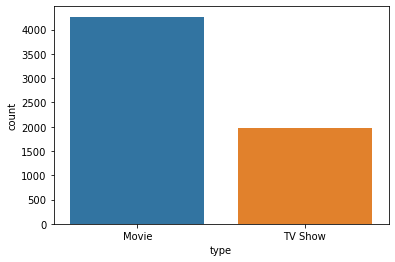

In [11]:
sns.countplot(data=df, x='type');

**How has increased the amount of productions over the years?**

In [18]:
df_date = df[['type', 'date_added']].copy()

df_date['date_added_ts'] = pd.to_datetime(df_date['date_added'])
df_date['year_added'] = df_date['date_added_ts'].dt.year
df_date['month_added'] = df_date['date_added_ts'].dt.month
df_date.head(2)

,type,date_added,date_added_ts,year_added,month_added
0,Movie,"September 9, 2019",2019-09-09,2019.0,9.0
1,Movie,"September 9, 2016",2016-09-09,2016.0,9.0


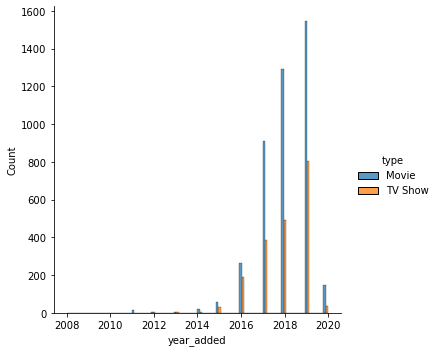

In [24]:
sns.displot(data=df_date, x='year_added', hue='type', kind='hist', multiple='dodge');

**If a producer wants to release some content, which month must he do so? (month when least amount of content is added)**

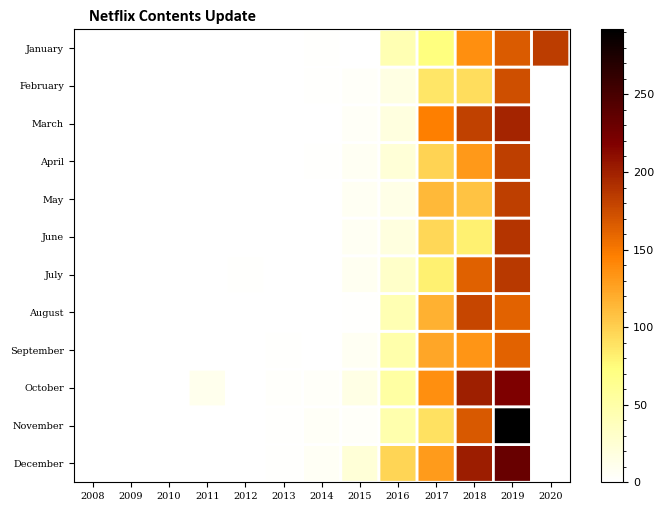

In [35]:
df = pd.read_csv(url)

netflix_date = df[['date_added']].dropna().copy()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(8, 6), dpi=100)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()